In [7]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [156]:
data = pd.read_csv('data/combinedClimateFiresDataset_2010.csv')

### Remove extra columns from data and create labels
sorted the entire table by date 
created features and labels from data


In [170]:
# data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0_x', 'Unnamed: 0'])
# data = data.sort_values('DATE_x')
# labels = pd.DataFrame()
# labels['FIRE_SIZE'] = data['FIRE_SIZE']
# labels['FIRE_SIZE_CLASS'] = data['FIRE_SIZE_CLASS']
# labels = labels[1:]
# data = data.drop(columns=['FIRE_SIZE_CLASS','FIRE_SIZE'])

data.head()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,OBJECTID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,SOURCE_REPORTING_UNIT,FIRE_NAME,FIRE_YEAR,DATE_x,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE_x,LONGITUDE_x,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,Shape,merging,Unnamed: 0_y,STATION,STATION_NAME,ELEVATION,LATITUDE_y,LONGITUDE_y,DATE_y,DLY-GRDD-BASE40,DLY-GRDD-BASE45,DLY-GRDD-BASE50,DLY-GRDD-BASE55,DLY-GRDD-BASE57,DLY-GRDD-BASE60,DLY-GRDD-BASE65,DLY-GRDD-BASE70,DLY-GRDD-BASE72,DLY-GRDD-TB4886,DLY-GRDD-TB5086,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,DLY-TAVG-NORMAL,DLY-DUTR-NORMAL,DLY-TMAX-NORMAL,DLY-TMIN-NORMAL,DLY-TAVG-STDDEV,DLY-DUTR-STDDEV,DLY-TMAX-STDDEV,DLY-TMIN-STDDEV,longLatOLS
4552,4552,185409,1876324,1876325,NONFED,ST-CACDF,ST/C&L,USCARRU,CARRU,HY 79 S/ VAIL LAKE RD,2009,2009-12-31,365,1440.0,2.0,Equipment Use,NaN,NaN,NaN,1.0,B,33.470,-116.953,13.0,STATE OR PRIVATE,CA,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x14r\xa5\x9e\x05=]\...,4552,129481,GHCND:USC00044484,KELSEY 1 N CA US,609.6,38.80880,-120.82080,2010-09-29,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.55,-9999.0,25.27,-9999.0,91,62,27,8,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
3144,3144,145538,1219431,1219432,FED,DOI-WFMI,NPS,USCAJTP,CAJTP,ATLANTIS,2010,2010-01-01,1,1545.0,9.0,Miscellaneous,2010-01-01,1.0,2300.0,0.1,A,34.020,-116.180,3.0,NPS,CA,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\xb4\x10\xe4\xa0\x84...,3144,131035,GHCND:USC00044259,INDIO FIRE STATION CA US,-6.4,33.70860,-116.21520,2010-01-01,17,12,8,4,2,1,-7777,-7777,0,12,11,12,8,4,2,1,-7777,-7777,0,0,-7777,-7777,1,2,4,8,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.02,0.0,0.02,0.0,64,50,15,6,0,0,0,0,0,0,0,0,0,57.3,26.7,70.7,44.0,5.3,7.6,6.6,6.4,NaN
1393,1393,143727,1176703,1176704,FED,FS-FIRESTAT,FS,USCABDF,0512,NEW YEAR,2010,2010-01-01,1,1605.0,7.0,Arson,2010-01-01,1.0,1652.0,0.2,A,34.347,-117.442,5.0,USFS,CA,071,San Bernardino,b'\x00\x01\xad\x10\x00\x00\x94\xe4\x80]M\\]\xc...,1393,100740,GHCND:USW00003167,HAWTHORNE MUNICIPAL AIRPORT CA US,19.2,33.92278,-118.33417,2010-01-01,17,12,7,3,2,1,-7777,-7777,0,10,9,12,7,3,2,1,-7777,-7777,0,0,0,-7777,1,2,4,8,-9999.00,-9999,-9999.0,-9999.00,-9999,-9999.0,-9999.00,-9999,-9999.0,0.13,-9999.0,0.13,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,57.2,17.9,66.1,48.2,4.7,7.8,7.4,4.4,NaN
1374,1374,143708,1147182,1147183,FED,FS-FIRESTAT,FS,USCASTF,0516,CEDAR,2010,2010-01-01,1,1200.0,9.0,Miscellaneous,2010-01-11,11.0,1200.0,0.1,A,38.069,-120.277,5.0,USFS,CA,109,Tuolumne,b'\x00\x01\xad\x10\x00\x00x8\x81\xe9\xb4\x11^\...,1374,87965,GHCND:USC00046252,NORTH FORK RANGER STATION CA US,806.2,37.23278,-119.50972,2010-01-01,5,2,1,-7777,-7777,0,0,0,0,5,4,2,1,-7777,-7777,0,0,0,0,1,3,7,11,13,16,21,-9999.00,-9999,-9999.0,-9999.00,-9999,-9999.0,-9999.00,-9999,-9999.0,0.25,-9999.0,0.25,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,43.7,25.0,56.2,

In [158]:
# data = data.drop(columns=['DATE_x','DATE_y', 'DISCOVERY_TIME', 'CONT_DATE',
#                           'CONT_TIME','SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
#                           'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
#                           'SOURCE_REPORTING_UNIT', 'FIRE_NAME', 'OWNER_DESCR',
#                           'Shape', 'STATION', 'STATION_NAME', 'STAT_CAUSE_DESCR'])
# data = data.drop(columns=['STATE', 'COUNTY', 'FIPS_NAME'])

features = data[['DLY-GRDD-BASE40', 'DLY-GRDD-BASE45', 'DLY-GRDD-BASE50',
       'DLY-GRDD-BASE55', 'DLY-GRDD-BASE57', 'DLY-GRDD-BASE60',
       'DLY-GRDD-BASE65', 'DLY-GRDD-BASE70', 'DLY-GRDD-BASE72',
       'DLY-GRDD-TB4886', 'DLY-GRDD-TB5086', 'DLY-CLDD-BASE45',
       'DLY-CLDD-BASE50', 'DLY-CLDD-BASE55', 'DLY-CLDD-BASE57',
       'DLY-CLDD-BASE60', 'DLY-CLDD-NORMAL', 'DLY-CLDD-BASE70',
       'DLY-CLDD-BASE72', 'DLY-HTDD-BASE40', 'DLY-HTDD-BASE45',
       'DLY-HTDD-BASE50', 'DLY-HTDD-BASE55', 'DLY-HTDD-BASE57',
       'DLY-HTDD-BASE60', 'DLY-HTDD-NORMAL', 'DLY-PRCP-25PCTL',
       'DLY-SNWD-25PCTL', 'DLY-SNOW-25PCTL', 'DLY-PRCP-50PCTL',
       'DLY-SNWD-50PCTL', 'DLY-SNOW-50PCTL', 'DLY-PRCP-75PCTL',
       'DLY-SNWD-75PCTL', 'DLY-SNOW-75PCTL', 'MTD-PRCP-NORMAL',
       'MTD-SNOW-NORMAL', 'YTD-PRCP-NORMAL', 'YTD-SNOW-NORMAL',
       'DLY-PRCP-PCTALL-GE001HI', 'DLY-PRCP-PCTALL-GE010HI',
       'DLY-PRCP-PCTALL-GE050HI', 'DLY-PRCP-PCTALL-GE100HI',
       'DLY-SNWD-PCTALL-GE001WI', 'DLY-SNWD-PCTALL-GE010WI',
       'DLY-SNWD-PCTALL-GE003WI', 'DLY-SNWD-PCTALL-GE005WI',
       'DLY-SNOW-PCTALL-GE001TI', 'DLY-SNOW-PCTALL-GE010TI',
       'DLY-SNOW-PCTALL-GE100TI', 'DLY-SNOW-PCTALL-GE030TI',
       'DLY-SNOW-PCTALL-GE050TI', 'DLY-TAVG-NORMAL', 'DLY-DUTR-NORMAL',
       'DLY-TMAX-NORMAL', 'DLY-TMIN-NORMAL', 'DLY-TAVG-STDDEV',
       'DLY-DUTR-STDDEV', 'DLY-TMAX-STDDEV', 'DLY-TMIN-STDDEV',]]

In [289]:
features.columns.values
# data.dtypes
features.head()

,DLY-DUTR-NORMAL,DLY-GRDD-BASE40,DLY-TAVG-NORMAL,DLY-TMAX-NORMAL,DLY-TMIN-NORMAL,MTD-PRCP-NORMAL,YTD-PRCP-NORMAL,DLY-PRCP-PCTALL-GE001HI,lat,long
3144,26.7,17.0,57.3,70.7,44.0,0.02,0.02,64.0,34.020,-116.180
1393,17.9,17.0,57.2,66.1,48.2,0.13,0.13,64.0,34.347,-117.442
1374,25.0,5.0,43.7,56.2,31.2,0.25,0.25,64.0,38.069,-120.277
245,15.4,4.0,43.7,51.4,36.0,0.23,0.23,64.0,37.285,-120.498
964,15.4,4.0,43.7,51.4,36.0,0.05,0.05,108.0,33.628,-116.216


In [160]:
# # Replace negative values by na
features[features < 0] = None



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [120]:
missing_percentage = []
for column in features.columns:
    missing_percentage.append(str(int(features[column].isna().sum()/len(features[column])*100)) + "% missing in "+ column)
missing_percentage.sort()
missing_percentage

['18% missing in DLY-CLDD-BASE45',
 '18% missing in DLY-CLDD-BASE50',
 '18% missing in DLY-DUTR-NORMAL',
 '18% missing in DLY-GRDD-BASE40',
 '18% missing in DLY-GRDD-BASE45',
 '18% missing in DLY-GRDD-BASE50',
 '18% missing in DLY-GRDD-TB4886',
 '18% missing in DLY-GRDD-TB5086',
 '18% missing in DLY-TAVG-NORMAL',
 '18% missing in DLY-TMAX-NORMAL',
 '18% missing in DLY-TMIN-NORMAL',
 '2% missing in MTD-PRCP-NORMAL',
 '2% missing in YTD-PRCP-NORMAL',
 '20% missing in DLY-CLDD-BASE55',
 '20% missing in DLY-GRDD-BASE55',
 '21% missing in DLY-CLDD-BASE57',
 '21% missing in DLY-GRDD-BASE57',
 '22% missing in DLY-PRCP-PCTALL-GE001HI',
 '24% missing in DLY-CLDD-BASE60',
 '24% missing in DLY-GRDD-BASE60']

In [161]:
features = features[['DLY-CLDD-BASE45',
 'DLY-CLDD-BASE50',
 'DLY-DUTR-NORMAL',
 'DLY-GRDD-BASE40',
 'DLY-GRDD-BASE45',
 'DLY-GRDD-BASE50',
 'DLY-GRDD-TB4886',
 'DLY-GRDD-TB5086',
 'DLY-TAVG-NORMAL',
 'DLY-TMAX-NORMAL',
 'DLY-TMIN-NORMAL',
 'MTD-PRCP-NORMAL',
 'YTD-PRCP-NORMAL',
 'DLY-CLDD-BASE55',
 'DLY-GRDD-BASE55',
 'DLY-CLDD-BASE57',
 'DLY-GRDD-BASE57',
 'DLY-PRCP-PCTALL-GE001HI',
 'DLY-CLDD-BASE60',
 'DLY-GRDD-BASE60']]





In [288]:
# FILL NA VALUES WITH FFILL
# features.fillna(method='ffill', inplace=True)
# features = features[1:]

features.head()

,DLY-DUTR-NORMAL,DLY-GRDD-BASE40,DLY-TAVG-NORMAL,DLY-TMAX-NORMAL,DLY-TMIN-NORMAL,MTD-PRCP-NORMAL,YTD-PRCP-NORMAL,DLY-PRCP-PCTALL-GE001HI,lat,long
3144,26.7,17.0,57.3,70.7,44.0,0.02,0.02,64.0,34.020,-116.180
1393,17.9,17.0,57.2,66.1,48.2,0.13,0.13,64.0,34.347,-117.442
1374,25.0,5.0,43.7,56.2,31.2,0.25,0.25,64.0,38.069,-120.277
245,15.4,4.0,43.7,51.4,36.0,0.23,0.23,64.0,37.285,-120.498
964,15.4,4.0,43.7,51.4,36.0,0.05,0.05,108.0,33.628,-116.216


## Predicting FIRE_SIZE_CLASS

### Feature Selection
Used RFE (Recursive Feature Elimination) for feature selection and print the best features below


In [150]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from itertools import compress


In [241]:
model = RandomForestClassifier()
rfe = RFE(model, 10)

In [243]:
rfe.fit(features, labels.FIRE_SIZE_CLASS)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [244]:
list(compress(features.columns.values, rfe.get_support()))

['DLY-DUTR-NORMAL',
 'DLY-GRDD-BASE40',
 'DLY-TAVG-NORMAL',
 'DLY-TMAX-NORMAL',
 'DLY-TMIN-NORMAL',
 'MTD-PRCP-NORMAL',
 'YTD-PRCP-NORMAL',
 'DLY-PRCP-PCTALL-GE001HI',
 'lat',
 'long']

In [246]:
features = features[['DLY-DUTR-NORMAL',
 'DLY-GRDD-BASE40',
 'DLY-TAVG-NORMAL',
 'DLY-TMAX-NORMAL',
 'DLY-TMIN-NORMAL',
 'MTD-PRCP-NORMAL',
 'YTD-PRCP-NORMAL',
 'DLY-PRCP-PCTALL-GE001HI',
 'lat',
 'long']]
# features.columns.values


In [237]:
# features['lat'] = data['LATITUDE_x']
# features['long'] = data['LONGITUDE_x']


## Train Test Split

In [247]:
from sklearn.model_selection import train_test_split # Split into train test data

train_features, test_features, train_outcome, test_outcome = train_test_split(
    features,
    labels.FIRE_SIZE_CLASS,
    test_size = 0.25,
    random_state = 11
)

## Implementing Models
I performed hyper tuning for most of the models and narrowed down the best working parameters. And then rerun the models with narrowed parameters below


In [377]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.neighbors import KNeighborsClassifier    # classifier
from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()# for making pipelines
scaler = MinMaxScaler()
knn_class = KNeighborsClassifier()
# from sklearn.linear_model import LinearRegression
# linear_reg = LinearRegression()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import RidgeClassifier



rfc = RandomForestClassifier()
scores = {
    "KNeighborsClassifier":0,
    "RandomForestClassifier":0,
    "RidgeClassifier":0
}

### KNN Classifier

In [392]:
# Define a pipeline that includes the polynomial transformation
pipe = make_pipeline(poly, scaler, knn_class)

# Define a grid to search through (including the degree of polynomial)
param_grid = {'polynomialfeatures__degree':range(1, 3), 
              'kneighborsclassifier__n_neighbors':range(1, 4), 
              'kneighborsclassifier__weights':["uniform", "distance"]}

# Perform a  grid search of your pipeline
grid = GridSearchCV(pipe, param_grid, scoring="accuracy", verbose=1)

grid.fit(train_features, train_outcome)
print(grid.score(test_features, test_outcome))
scores['KNeighborsClassifier'] = grid.score(test_features, test_outcome)
print(grid.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.531163434903
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform', 'polynomialfeatures__degree': 1}


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    7.5s finished


## RidgeCV Classifier

In [378]:


# Define a pipeline that includes the polynomial transformation
pipe = make_pipeline(poly, scaler, RidgeClassifier())

# Define a grid to search through (including the degree of polynomial)
param_grid = {'polynomialfeatures__degree':range(1, 3), 
              }

# Perform a  grid search of your pipeline
grid = GridSearchCV(pipe, param_grid, scoring="accuracy", verbose=1)

grid.fit(train_features, train_outcome)
print(grid.score(test_features, test_outcome))
scores['RidgeClassifier'] = grid.score(test_features, test_outcome)
print(grid.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
0.540858725762
{'polynomialfeatures__degree': 2}


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished


## Random Forest Classification

In [391]:
pipe = make_pipeline(poly, scaler,rfc)

param_grid = {'polynomialfeatures__degree':[1],
             'randomforestclassifier__bootstrap': [True],
             'randomforestclassifier__max_depth': [10],
             'randomforestclassifier__max_features': ['auto'],
             'randomforestclassifier__min_samples_leaf': [4],
             'randomforestclassifier__min_samples_split': [10],
             'randomforestclassifier__n_estimators': [ 600]}

# Perform a  grid search of your pipeline
grid = GridSearchCV(pipe, param_grid, scoring="accuracy", verbose=10)

grid.fit(train_features, train_outcome)
print(grid.score(test_features, test_outcome))
scores['RandomForestClassifier'] = grid.score(test_features, test_outcome)
print(grid.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600 
[CV]  polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600, score=0.595436, total=   3.4s
[CV] polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600, score=0.596260, total=   3.2s
[CV] polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV]  polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600, score=0.607911, total=   3.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s finished


0.608033240997
{'polynomialfeatures__degree': 1, 'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 600}


### Visualizing Scores

In [394]:
s = []
m = []
for k in scores:
    m.append(str(k))
    s.append(scores[k])
d = pd.DataFrame()
d['m'] = m
d['s'] = s

In [390]:
d

,m,s
0,KNeighborsClassifier,0.000000
1,RandomForestClassifier,0.000000
2,RidgeClassifier,0.540859


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


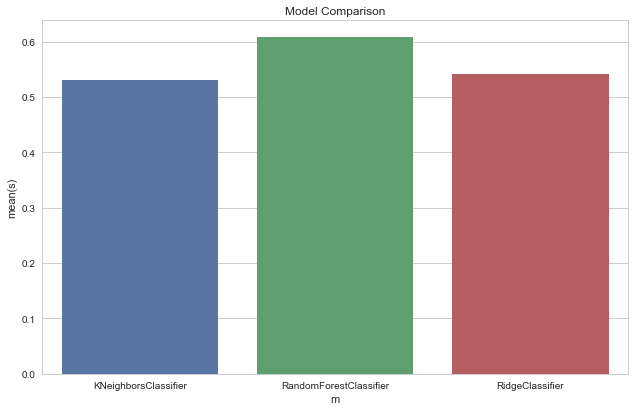

In [395]:
sns.set(style="whitegrid")
g = sns.barplot(x="m",y="s", data=d).set_title('Model Comparison')
g.figure.set_size_inches(10.5, 6.5)
sns.plt.show()

## Adding 'Fires' features as predictors
The models below have both fires and climate features. Adding fire cause features does increase the model prediction. Future implementation and something to consider would be lag, which we couldn't do due to the scope and timeframe of the project

In [327]:
fires_climate_combined = data[['DISCOVERY_DOY', 'OWNER_CODE', 'STAT_CAUSE_DESCR',
                               'OWNER_DESCR','DLY-DUTR-NORMAL','DLY-GRDD-BASE40',
                               'DLY-TAVG-NORMAL','DLY-TMAX-NORMAL','DLY-TMIN-NORMAL',
                               'MTD-PRCP-NORMAL','YTD-PRCP-NORMAL','DLY-PRCP-PCTALL-GE001HI',
                               ]]

In [328]:
fires_climate_combined = pd.get_dummies(fires_climate_combined)

In [329]:
## Forward fill for filling NA values
fires_climate_combined[fires_climate_combined < 0] = None
fires_climate_combined.fillna(method='ffill', inplace=True)
fires_climate_combined = fires_climate_combined[1:]

In [330]:
fires_climate_combined['lat'] = features['lat']
fires_climate_combined['long'] = features['long']

In [334]:
# fires_climate_combined = features.merge(fires_climate_combined, on=['lat', 'long'], how='left')
fires_climate_combined = pd.merge(fires_climate_combined, features, left_index=True, right_index=True)

In [335]:
len(fires_climate_combined)

5775

### Re-Selecting best features from combined data
still using recursive feature elimination to find top 10 features

In [336]:
rfe.fit(fires_climate_combined, labels.FIRE_SIZE_CLASS)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [339]:
list(compress(fires_climate_combined.columns.values, rfe.get_support()))

['DISCOVERY_DOY',
 'OWNER_CODE',
 'DLY-DUTR-NORMAL_x',
 'lat_x',
 'long_x',
 'DLY-TMIN-NORMAL_y',
 'YTD-PRCP-NORMAL_y',
 'DLY-PRCP-PCTALL-GE001HI_y',
 'lat_y',
 'long_y']

In [338]:
fires_climate_combined.head()

,DISCOVERY_DOY,OWNER_CODE,DLY-DUTR-NORMAL_x,DLY-GRDD-BASE40_x,DLY-TAVG-NORMAL_x,DLY-TMAX-NORMAL_x,DLY-TMIN-NORMAL_x,MTD-PRCP-NORMAL_x,YTD-PRCP-NORMAL_x,DLY-PRCP-PCTALL-GE001HI_x,STAT_CAUSE_DESCR_Arson,STAT_CAUSE_DESCR_Campfire,STAT_CAUSE_DESCR_Children,STAT_CAUSE_DESCR_Debris Burning,STAT_CAUSE_DESCR_Equipment Use,STAT_CAUSE_DESCR_Fireworks,STAT_CAUSE_DESCR_Lightning,STAT_CAUSE_DESCR_Miscellaneous,STAT_CAUSE_DESCR_Missing/Undefined,STAT_CAUSE_DESCR_Powerline,STAT_CAUSE_DESCR_Railroad,STAT_CAUSE_DESCR_Smoking,STAT_CAUSE_DESCR_Structure,OWNER_DESCR_BIA,OWNER_DESCR_BLM,OWNER_DESCR_FWS,OWNER_DESCR_MISSING/NOT SPECIFIED,OWNER_DESCR_MUNICIPAL/LOCAL,OWNER_DESCR_NPS,OWNER_DESCR_OTHER FEDERAL,OWNER_DESCR_PRIVATE,OWNER_DESCR_STATE,OWNER_DESCR_STATE OR PRIVATE,OWNER_DESCR_TRIBAL,OWNER_DESCR_USFS,lat_x,long_x,DLY-DUTR-NORMAL_y,DLY-GRDD-BASE40_y,DLY-TAVG-NORMAL_y,DLY-TMAX-NORMAL_y,DLY-TMIN-NORMAL_y,MTD-PRCP-NORMAL_y,YTD-PRCP-NORMAL_y,DLY-PRCP-PCTALL-GE001HI_y,lat_y,long_y
3144,1,3.0,26.7,17.0,57.3,70.7,44.0,0.02,0.02,64.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,34.020,-116.180,26.7,17.0,57.3,70.7,44.0,0.02,0.02,64.0,34.020,-116.180
1393,1,5.0,17.9,17.0,57.2,66.1,48.2,0.13,0.13,64.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34.347,-117.442,17.9,17.0,57.2,66.1,48.2,0.13,0.13,64.0,34.347,-117.442
1374,1,5.0,25.0,5.0,43.7,56.2,31.2,0.25,0.25,64.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38.069,-120.277,25.0,5.0,43.7,56.2,31.2,0.25,0.25,64.0,38.069,-120.277
245,2,14.0,15.4,4.0,43.7,51.4,36.0,0.23,0.23,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,37.285,-120.498,15.4,4.0,43.7,51.4,36.0,0.23,0.23,64.0,37.285,-120.498
964,2,14.0,15.4,4.0,43.7,51.4,36.0,0.05,0.05,108.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,33.628,-116.216,15.4,4.0,43.7,51.4,36.0,0.05,0.05,108.0,33.628,-116.216


### Split into train test

In [342]:
combined_features = fires_climate_combined[['DISCOVERY_DOY',
 'OWNER_CODE',
 'DLY-DUTR-NORMAL_x',
 'lat_x',
 'long_x',
 'DLY-TMIN-NORMAL_y',
 'YTD-PRCP-NORMAL_y',
 'DLY-PRCP-PCTALL-GE001HI_y']]

In [343]:
train_features_c, test_features_c, train_outcome_c, test_outcome_c = train_test_split(
    combined_features,
    labels.FIRE_SIZE_CLASS,
    test_size = 0.25,
    random_state = 11
)

In [383]:
scores_c = {
    "GradientBoostingClassifier":0,
    "RandomForestClassifier":0
}

## Random Forest Classifier

In [386]:
pipe = make_pipeline(poly, scaler, rfc)

param_grid = {'polynomialfeatures__degree':[1],
             'randomforestclassifier__bootstrap': [True],
             'randomforestclassifier__max_depth': [10],
             'randomforestclassifier__max_features': ['auto'],
             'randomforestclassifier__min_samples_leaf': [4],
             'randomforestclassifier__min_samples_split': [10],
             'randomforestclassifier__n_estimators': [ 600]}

# Perform a  grid search of your pipeline
grid = GridSearchCV(pipe, param_grid, scoring="accuracy", verbose=10)

grid.fit(train_features_c, train_outcome_c)
print(grid.score(test_features_c, test_outcome_c))
scores_c['RandomForestClassifier'] = grid.score(test_features_c, test_outcome_c)
print(grid.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600 
[CV]  polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600, score=0.644537, total=   3.3s
[CV] polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600, score=0.620499, total=   3.1s
[CV] polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV]  polynomialfeatures__degree=1, randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=600, score=0.637058, total=   3.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s finished


0.634349030471
{'polynomialfeatures__degree': 1, 'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 600}
hi


## Gradient Boosting Classifier

In [347]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
from sklearn.ensemble import AdaBoostClassifier


In [387]:
pipe = make_pipeline(poly, scaler, gbc)

param_grid = {'polynomialfeatures__degree':[1,2,3]}

# Perform a  grid search of your pipeline
grid = GridSearchCV(pipe, param_grid, scoring="accuracy", verbose=10)

grid.fit(train_features_c, train_outcome_c)
print(grid.score(test_features_c, test_outcome_c))
scores_c['GradientBoostingClassifier'] = grid.score(test_features_c, test_outcome_c)
print(grid.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] polynomialfeatures__degree=1 ....................................
[CV] ..... polynomialfeatures__degree=1, score=0.636929, total=   2.1s
[CV] polynomialfeatures__degree=1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ..... polynomialfeatures__degree=1, score=0.607341, total=   2.0s
[CV] polynomialfeatures__degree=1 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] ..... polynomialfeatures__degree=1, score=0.622484, total=   1.8s
[CV] polynomialfeatures__degree=2 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s remaining:    0.0s


[CV] ..... polynomialfeatures__degree=2, score=0.616183, total=   7.0s
[CV] polynomialfeatures__degree=2 ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.0s remaining:    0.0s


[CV] ..... polynomialfeatures__degree=2, score=0.606648, total=   7.6s
[CV] polynomialfeatures__degree=2 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.6s remaining:    0.0s


[CV] ..... polynomialfeatures__degree=2, score=0.609299, total=   6.9s
[CV] polynomialfeatures__degree=3 ....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.5s remaining:    0.0s


[CV] ..... polynomialfeatures__degree=3, score=0.626556, total=  26.1s
[CV] polynomialfeatures__degree=3 ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   53.7s remaining:    0.0s


[CV] ..... polynomialfeatures__degree=3, score=0.614958, total=  25.6s
[CV] polynomialfeatures__degree=3 ....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV] ..... polynomialfeatures__degree=3, score=0.610687, total=  27.2s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min finished


0.629501385042
{'polynomialfeatures__degree': 1}


## Visualising models
 Almost the same performance

In [388]:
sc = []
mc = []
for k in scores_c:
    mc.append(str(k))
    sc.append(scores_c[k])
dc = pd.DataFrame()
dc['m'] = mc
dc['s'] = sc

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


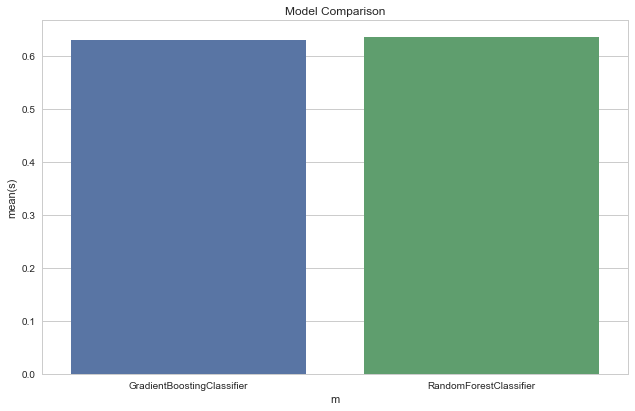

In [389]:
sns.set(style="whitegrid")
g = sns.barplot(x="m",y="s", data=dc).set_title('Model Comparison')
g.figure.set_size_inches(10.5, 6.5)
sns.plt.show()